<a href="https://colab.research.google.com/github/gitmystuff/DSChunks/blob/main/Colors_by_Allison_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colors By Allison

Thank you Allison Parrish

https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469

## Objectives

* Show how a corpus of text can can be arranged to show relationships
* Explore vectors
* Perform similarity search
* Look at some of the maths with similarity search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
corpus = [
    "leader is decisive",
    "teacher is patient",
    "doctor is compassionate",
    "artist is creative",
    "musician is expressive",
    "athlete is disciplined",
    "leader is to politician as doctor is to surgeon",
    "painter is to sculptor as musician is to composer",
    "decisive and focused",
    "patient and understanding",
    "compassionate and empathetic",
    "creative and imaginative",
    "expressive and passionate",
    "disciplined and resilient"
]

# Create a Bag-of-Words (BoW) representation with stop words removed
vectorizer = CountVectorizer(stop_words='english')  # Use the built-in English stop words
bow_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame from the BoW matrix
df = pd.DataFrame(data=bow_matrix.toarray(), columns=feature_names, index=[f'Sentence {i+1}' for i in range(len(corpus))])

df

,artist,athlete,compassionate,composer,creative,decisive,disciplined,doctor,empathetic,expressive,...,musician,painter,passionate,patient,politician,resilient,sculptor,surgeon,teacher,understanding
Sentence 1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Sentence 3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence 4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence 5,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Sentence 6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence 7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
Sentence 8,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
Sentence 9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentence 10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


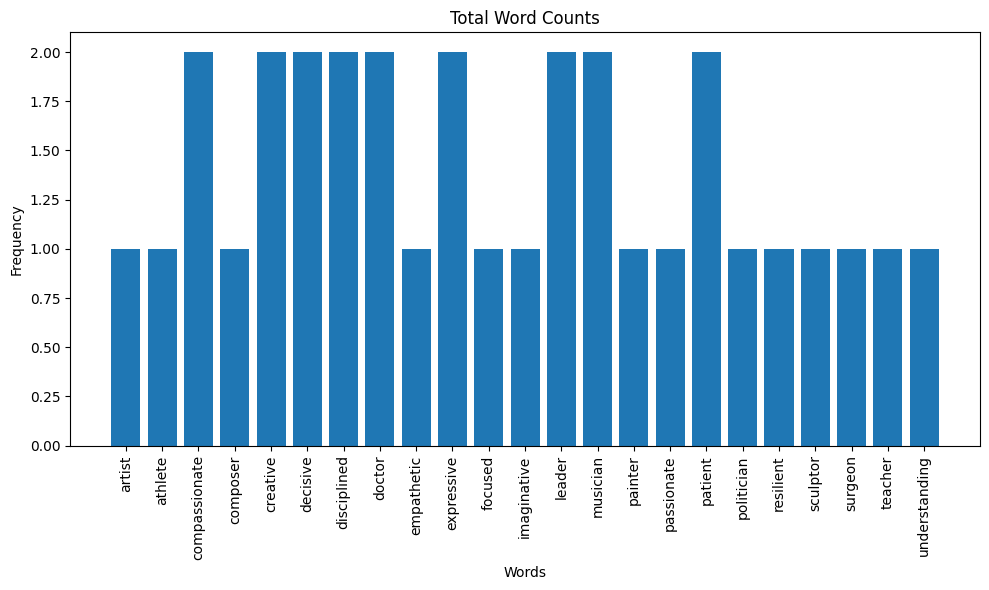

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total count of each word
word_counts = df.sum(axis=0)  # Sum across rows (sentences)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(word_counts.index, word_counts.values)
plt.title("Total Word Counts")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF representation with stop words removed
vectorizer = TfidfVectorizer(stop_words='english')  # Use the built-in English stop words
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame from the TF-IDF matrix
df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names, index=[f'Sentence {i+1}' for i in range(len(corpus))])

df

,artist,athlete,compassionate,composer,creative,decisive,disciplined,doctor,empathetic,expressive,...,musician,painter,passionate,patient,politician,resilient,sculptor,surgeon,teacher,understanding
Sentence 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sentence 2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.654432,0.000000,0.000000,0.000000,0.000000,0.756121,0.000000
Sentence 3,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sentence 4,0.756121,0.000000,0.000000,0.000000,0.654432,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sentence 5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sentence 6,0.000000,0.756121,0.000000,0.000000,0.000000,0.000000,0.654432,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sentence 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.462753,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.534658,0.000000,0.000000,0.534658,0.000000,0.000000
Sentence 8,0.000000,0.000000,0.000000,0.516459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.447002,0.516459,0.000000,0.000000,0.000000,0.000000,0.516459,0.000000,0.000000,0.000000
Sentence 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.654432,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sentence 10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.654432,0.000000,0.000000,0.000000,0.000000,0.000000,0.756121


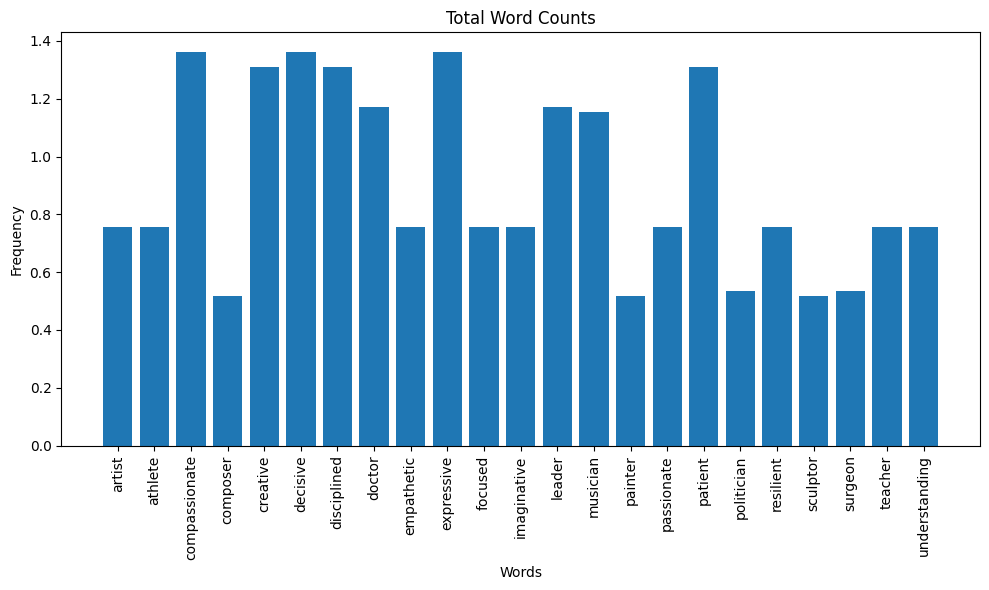

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total count of each word
word_counts = df.sum(axis=0)  # Sum across rows (sentences)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(word_counts.index, word_counts.values)
plt.title("Total Word Counts")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF representation with stop words removed
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame from the TF-IDF matrix
df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names, index=[f'Sentence {i+1}' for i in range(len(corpus))])

# Calculate cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calculate cosine similarities between all pairs of words
similarities = np.zeros((len(feature_names), len(feature_names)))
for i, word1 in enumerate(feature_names):
    for j, word2 in enumerate(feature_names):
        vector1 = df.loc[:, word1].values
        vector2 = df.loc[:, word2].values
        similarities[i, j] = cosine_similarity(vector1, vector2)

# Create a DataFrame for the similarity matrix
similarity_df = pd.DataFrame(data=similarities, columns=feature_names, index=feature_names)
similarity_df

,artist,athlete,compassionate,composer,creative,decisive,disciplined,doctor,empathetic,expressive,...,musician,painter,passionate,patient,politician,resilient,sculptor,surgeon,teacher,understanding
artist,1.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
athlete,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
compassionate,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.614099,0.679242,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
composer,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.534342,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
creative,0.707107,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
decisive,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
disciplined,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000
doctor,0.000000,0.000000,0.614099,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.547593,0.000000,0.000000,0.547593,0.000000,0.000000
empathetic,0.000000,0.000000,0.679242,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
expressive,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.620354,0.000000,0.679242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


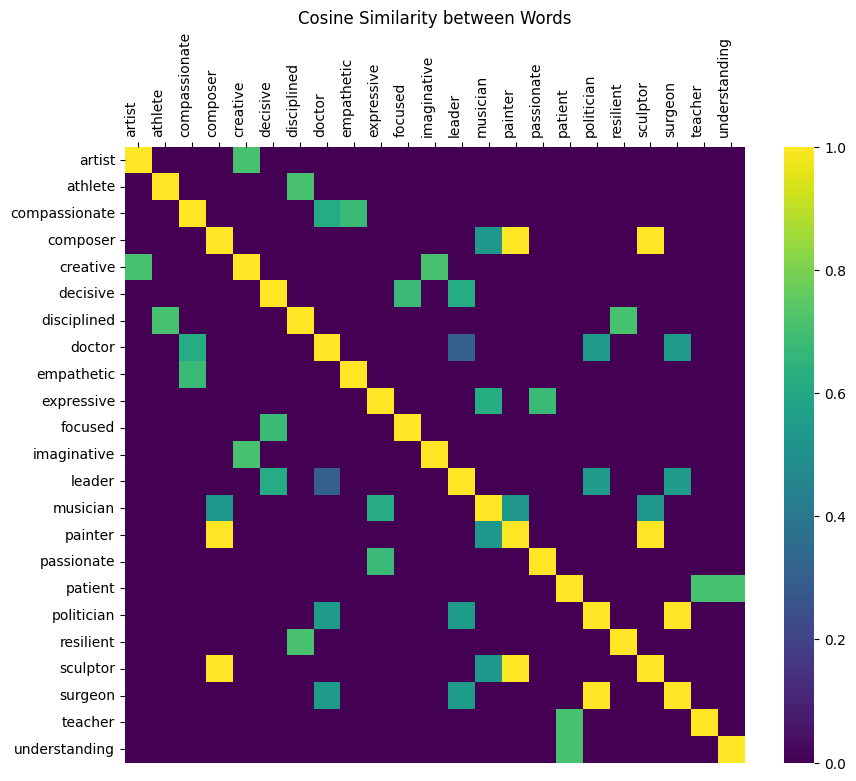

In [ ]:
# create heatmap similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Adjust figure size if needed
ax = sns.heatmap(similarity_df, annot=False, cmap='viridis', fmt=".2f")
ax.set_xticklabels(feature_names, rotation=90, ha='right')
ax.xaxis.tick_top()
ax.set_yticklabels(feature_names, rotation=0)
plt.title('Cosine Similarity between Words')
plt.show()

<pre>
corpus = [
    "leader is decisive",
    "teacher is patient",
    "doctor is compassionate",
    "artist is creative",
    "musician is expressive",
    "athlete is disciplined",
    "leader is to politician as doctor is to surgeon",
    "painter is to sculptor as musician is to composer",
    "decisive and focused",
    "patient and understanding",
    "compassionate and empathetic",
    "creative and imaginative",
    "expressive and passionate",
    "disciplined and resilient"
]
</pre>

In [ ]:
def get_similar_words(word, similarity_df, top_n=5):
  """
  Gets the `top_n` most similar words to a given word based on cosine similarity.

  Args:
      word (str): The word to find similar words for.
      similarity_df (pd.DataFrame): The DataFrame containing the cosine similarity matrix.
      top_n (int, optional): The number of most similar words to return. Defaults to 5.

  Returns:
      list: A list of the `top_n` most similar words.
  """

  if word not in similarity_df.columns:
      print(f"Word '{word}' not found in the corpus.")
      return []

  # Get the similarity scores for the given word
  similarities = similarity_df.loc[word, :].values

  # Get the indices of the most similar words (excluding the word itself)
  similar_indices = np.argpartition(similarities, -(top_n+1))[-(top_n+1):]
  similar_indices = [idx for idx in similar_indices if feature_names[idx] != word]  # Exclude the word itself
  similar_indices = similar_indices[:top_n]  # Keep only the top_n

  # Get the most similar words
  similar_words = similarity_df.columns[similar_indices].tolist()

  return similar_words

# Example usage
word = 'patient'  # Change this to the word you want to find similar words for
similar_words = get_similar_words(word, similarity_df, top_n=10)  # Get top 10 similar words

print(f"\nWords similar to '{word}':")
for similar_word in similar_words:
    print(f"  - {similar_word}")


Words similar to 'patient':
  - expressive
  - creative
  - decisive
  - compassionate
  - focused
  - doctor
  - empathetic
  - composer
  - understanding
  - teacher


## Terms

A way of representing words as vectors in a multi-dimensional space, where the distance and direction between vectors reflect the similarity and relationships among the corresponding words.

https://www.ibm.com/topics/word-embeddings

### Word2Vec

Word2vec is a technique in natural language processing for obtaining vector representations of words. These vectors capture information about the meaning of the word based on the surrounding words. The word2vec algorithm estimates these representations by modeling text in a large corpus.

https://en.wikipedia.org/wiki/Word2vec

https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469

* Turning words into measurable / similar numbers
* Word embeddings
* Neural Networks, Backpropagation, ArgMax, SoftMax, and Cross Entropy

### Neural Network

A machine learning method that uses interconnected nodes or neurons to process data in a way that mimics the human brain

### Backpropagation

Works by testing for errors from the weights of a neuron and then going back and fine tuning those weights, ex. gradient descent

### Argmax

Returns the indices of the max value along an axis

### Softmax

A vector of probabilities for each possible outcome such as classification

### Cross Entropy

Measures the difference, entropy, between probabilities. Entropy is the number of bits required to transmit a randomly selected event from a probability distribution, a Monte Carlo method for importance sampling





### Similarity

* A neural network can be used to assign different values to the same word used in different contexts
* Activation functions and associated weights are used for each value assigned to a word
* Depending on context a word with the largest weight will be chosen
* Since a word has multiple values, a vector, it is possible to 'plot' the words thus providing a graphed similarity with other words

### CBOW

Uses context to predict a target word, a type of unsupervised learning, learning from unlabeled data

### Skip Gram

Predicts context words given a target word

### Negative Sampling

Aims to maximize the similarity of words in the same context and minimize when used in different contexts

## The Data

In [ ]:
# source = https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469 by Allison Parrish
import urllib.request, json

url = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/xkcd.json'
with urllib.request.urlopen(url) as url:
    color_data = json.load(url)

type(color_data)

dict

In [ ]:
color_data.keys()

dict_keys(['description', 'colors'])

In [ ]:
print(color_data['description'])
print(color_data['colors'][0:5])

The 954 most common RGB monitor colors, as defined by several hundred thousand participants in the xkcd color name survey.
[{'color': 'darker blue', 'hex': '#011288'}, {'color': 'darker green', 'hex': '#087804'}, {'color': 'green again', 'hex': '#16d43f'}, {'color': 'darker purple', 'hex': '#5f1b6b'}, {'color': 'darker pink', 'hex': '#c4387f'}]


In [ ]:
color_data['colors'][0]

{'color': 'darker blue', 'hex': '#011288'}

In [ ]:
import math

def hex_to_int(s):
    h = s
    s = s.lstrip("#")
    return int(s[:2], 16), int(s[2:4], 16), int(s[4:6], 16), h

def distance(coord1, coord2):
    # note, this is VERY SLOW, don't use for actual code
    coord1 = coord1[:3]
    coord2 = coord2[:3]
    return math.sqrt(sum([(i - j)**2 for i, j in zip(coord1, coord2)]))

def subtractv(coord1, coord2):
    coord1 = coord1[:3]
    coord2 = coord2[:3]
    return [c1 - c2 for c1, c2 in zip(coord1, coord2)]

def addv(coord1, coord2):
    coord1 = coord1[:3]
    coord2 = coord2[:3]
    return [c1 + c2 for c1, c2 in zip(coord1, coord2)]

def meanv(coords):
    # assumes every item in coords has same length as item 0
    sumv = [0] * len(coords[0])
    for item in coords:
        for i in range(len(item)):
            sumv[i] += item[i]
    mean = [0] * len(sumv)
    for i in range(len(sumv)):
        mean[i] = float(sumv[i]) / len(coords)
    return mean

def closest(space, coord, n=5):
    coord = coord[:3]
    closest = []
    for key in sorted(space.keys(),
                        key=lambda x: distance(coord, space[x]))[:n]:
        closest.append(key)
    return closest

The hexadecimal number system is a type of number system, that has a base value equal to 16.

https://www.calculator.net/hex-calculator.html?b2dnumber1=12&calctype=b2d&x=Calculate#hex2decimal

In [ ]:
s = color_data['colors'][0]['hex']
print(s)
hex_to_int(s)

#011288


(1, 18, 136, '#011288')

**Hexadecimal (base-16) uses 16 digits: 0-9 and A-F.**

* **Decimal:**  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
* **Hexadecimal:** 0 1 2 3 4 5 6 7 8 9 A  B  C  D  E  F

To convert hex to decimal, you multiply each digit by its corresponding power of 16 and sum the results.

**So, for hex 88:**

* **8 (leftmost digit):** 8 * 16<sup>1</sup> = 8 * 16 = 128
* **8 (rightmost digit):** 8 * 16<sup>0</sup> = 8 * 1 = 8

**Sum:** 128 + 8 = **136**


In [ ]:
colors = dict()
for item in color_data['colors']:
    colors[item['color']] = hex_to_int(item['hex'])

print('olive', colors['olive'])
print('red', colors['red'])
print('black', colors['black'])

olive (110, 117, 14, '#6e750e')
red (229, 0, 0, '#e50000')
black (0, 0, 0, '#000000')


In [ ]:
print('darker purple', colors['darker purple'])

darker purple (95, 27, 107, '#5f1b6b')


In [ ]:
closest(colors, colors['red'])

['red', 'fire engine red', 'bright red', 'tomato red', 'cherry red']

In [ ]:
# check version
import plotly
plotly.__version__

'5.24.1'

In [ ]:
import numpy as np
import pandas as pd

def rgb_max(row):
  return row.index[np.argmax(row)]

df = pd.DataFrame(colors).transpose()
df.columns = ['red', 'green', 'blue', 'hex']
# df['group'] = df.apply(lambda x: df.columns[x.argmax()], axis = 1)
df['group'] = df[['red', 'green', 'blue']].apply(rgb_max, axis = 1)
df['color'] = df.index
df.head()

,red,green,blue,hex,group,color
darker blue,1,18,136,#011288,blue,darker blue
darker green,8,120,4,#087804,green,darker green
green again,22,212,63,#16d43f,green,green again
darker purple,95,27,107,#5f1b6b,blue,darker purple
darker pink,196,56,127,#c4387f,red,darker pink


In [ ]:
# plot 3 dimensions had to remove legend till more is learnt
import plotly.express as px

fig = px.scatter_3d(df, x = 'red',
                    y = 'green',
                    z = 'blue',
                    hover_data = ['color', 'group'])

fig.update_traces(marker=dict(
    # size=12,
    # line=dict(width=2, color=df['hex'])),
    color=df['group']),
    selector=dict(mode='markers')
)
fig.update_layout(
    showlegend=False,
    scene = dict(
        xaxis = dict(title = ''),
        yaxis = dict(title = ''),
        zaxis = dict(title = '')
    )
)
fig.show()

In [ ]:
# compare actual colors with distance?
import plotly.express as px

# color_map = {'red': 'red', 'green': 'green', 'blue': 'blue'}
fig = px.scatter_3d(df, x = 'red',
                    y = 'green',
                    z = 'blue',
                    hover_data = ['color', 'group'],
                    )

fig.update_traces(marker=dict(
    # size=12,
    # line=dict(width=2, color=df['hex'])),
    color=df['hex']),
    selector=dict(mode='markers'))

# Calculate the center point
center_x = df['red'].mean() # ~141
center_y = df['green'].mean() # ~134
center_z = df['blue'].mean() # ~107

# Add a scatter trace for the center point with a star marker
fig.add_scatter3d(x=[center_x],
                  y=[center_y],
                  z=[center_z],
                  mode='markers',
                  marker=dict(symbol='diamond', size=10, color='gold'),
                  name='Center')

# Choose a 3D point to connect to (you can change these coordinates)
# point_x = df['red'][2]  # Example: x-coordinate of the third data point
# point_y = df['green'][2]  # Example: y-coordinate of the third data point
# point_z = df['blue'][2]  # Example: z-coordinate of the third data point

# medium grey
point_x = 125
point_y = 127
point_z = 124

# Add a line trace from the center to the chosen point
fig.add_scatter3d(x=[center_x, point_x],
                  y=[center_y, point_y],
                  z=[center_z, point_z],
                  mode='lines',
                  line=dict(color='black', width=7),
                  name='Center to Medium Grey')

# bright blue
# point_x = 1
# point_y = 101
# point_z = 252

# burnt umber
# point_x = 160
# point_y = 69
# point_z = 14

# penwinkle blue
# point_x = 143
# point_y = 153
# point_z = 251

# warm grey
point_x = 151
point_y = 138
point_z = 132

# Add a line trace from the center to the chosen point
fig.add_scatter3d(x=[center_x, point_x],
                  y=[center_y, point_y],
                  z=[center_z, point_z],
                  mode='lines',
                  line=dict(color='black', width=7),
                  name='Center to Warm Grey')

fig.update_layout(
    showlegend=False,
    scene = dict(
        xaxis = dict(title = ''),
        yaxis = dict(title = ''),
        zaxis = dict(title = '')
    )
)
fig.show()

## Cosine Similarity and Dot Product

Cosine Similarity

* $sim(x,y) = cos(\theta) = \frac{x * y}{||x||||y||} = \frac{\sum{AB}}{\sqrt{\sum{A^2 B^2}}}$
* Normalizing - a factor that makes the norm or some associated quantity such as an integral equal to a desired value (usually 1)

Dot Product

* $\sum{ab} = a^Tb = ||a||||b||cos\theta$
* numpy.dot a = A @ B or a = numpy.dot(A,B)

Gemini, October 2, 2024

**1. Defining the Vectors**

First, we need to represent the lines as vectors.  Each line starts at the center point (`center_x`, `center_y`, `center_z`) and ends at a specific 3D point.  Let's define these vectors:

* **Vector v1:** From center to "medium grey" point (125, 127, 124)
   -  v1 = (125 - `center_x`, 127 - `center_y`, 124 - `center_z`)

* **Vector v2:** From center to "warm grey" point (151, 138, 132)
   - v2 = (151 - `center_x`, 138 - `center_y`, 132 - `center_z`)

**2. Dot Product**

The dot product of two vectors (v1 and v2) is calculated as:

   v1 • v2 = (v1_x * v2_x) + (v1_y * v2_y) + (v1_z * v2_z)

where v1_x, v1_y, v1_z are the components of vector v1, and similarly for v2.

**Geometric Interpretation:** The dot product is related to the angle (θ) between the two vectors and their magnitudes (||v1|| and ||v2||):

   v1 • v2 = ||v1|| * ||v2|| * cos(θ)

**3. Cosine Similarity**

Cosine similarity is a normalized measure of the angle between two vectors. It's calculated by dividing the dot product by the product of the magnitudes of the vectors:

   cosine_similarity(v1, v2) = (v1 • v2) / (||v1|| * ||v2||)

This simplifies to `cos(θ)`, as the magnitudes cancel out.

**Interpretation:**

* **Range:** Cosine similarity ranges from -1 to 1.
    * 1:  Vectors point in the same direction (θ = 0 degrees)
    * 0: Vectors are orthogonal (perpendicular, θ = 90 degrees)
    * -1: Vectors point in opposite directions (θ = 180 degrees)

* **In the plot:** The cosine similarity between v1 and v2 will tell you how similar the directions of the two lines are. A value close to 1 means the lines are almost aligned, while a value close to 0 means they are nearly perpendicular.


**Law of Cosines**

$c = \sqrt{a^2 + b^2 - 2abcos\theta}$

The dot product can be used to express the law of cosines, which relates the lengths of the sides of a triangle to the cosine of one of its angles.  

If you have vectors **A** and **B** forming two sides of a triangle, and **C** = **A** - **B** is the vector representing the third side, then the law of cosines can be written as:

```
||C||² = ||A||² + ||B||² - 2 * ||A|| * ||B|| * cos(θ)
```

where:

*   ||C||, ||A||, and ||B|| are the magnitudes (lengths) of the vectors
*   θ is the angle between vectors **A** and **B**

Solve:

given ||C||² = ||A||² + ||B||² - 2 * ||A|| * ||B|| * cos(θ), and A = 3 and B = 4,  and cos(θ) = 0 what is C

**Dot Product**

$A*B=||A|| ||B|| cos(\theta)$

**Variance of Joint Random Variables**

$var(aX + bY) = a^2 \sigma_x^2 + b^2 \sigma_y^2 = 2ab cov(X,Y)$

The variance of joint random variables is calculated to measure the relationship between the variables and how they vary together:

Relationship

The covariance can be computed to determine the strength of the relationship between the variables. If the covariance is nonzero, the variables are not independent and have some relationship. A negative covariance indicates an inverse relationship.

**Fun Time**

Law of Cosine

given ||C||² = ||A||² + ||B||² - 2 * ||A|| * ||B|| * cos(θ), and A = 3 and B = 4,  and cos(θ) = 0, and the origin is 0, 0, solve the dot product using coordinates

Dot Product

Given A = (3, 0) and B = (0, 4):
* A · B = (3 * 0) + (0 * 4) = 0 + 0 = 0

0.0


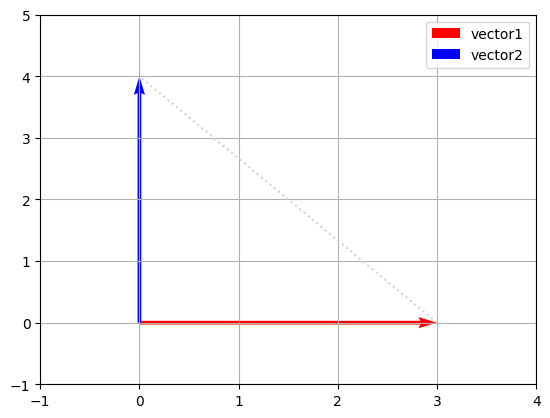

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine

# Define the vectors
vector1 = np.array([3, 0])
vector2 = np.array([0, 4])

similarity = 1 - cosine(vector1, vector2)
print(similarity)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the vectors using quiver
ax.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='r', label='vector1')
ax.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='b', label='vector2')
ax.plot(vector1, vector2, color='lightgray', linestyle='dotted')

# Set plot limits
ax.set_xlim([-1, 4])
ax.set_ylim([-1, 5])

# Add grid and legend
plt.grid()
plt.legend()
plt.show()

If the cosine similarity is 1, it means the vectors have the same direction and are perfectly similar. If the cosine similarity is 0, it means the vectors are perpendicular to each other and have no similarity. If the cosine similarity is -1, it means the vectors have opposite directions and are perfectly dissimilar.

In [ ]:
# compare actual colors with distance?
import plotly.express as px

# color_map = {'red': 'red', 'green': 'green', 'blue': 'blue'}
fig = px.scatter_3d(df, x = 'red',
                    y = 'green',
                    z = 'blue',
                    hover_data = ['color', 'group'],
                    )

fig.update_traces(marker=dict(
    # size=12,
    # line=dict(width=2, color=df['hex'])),
    color=df['hex']),
    selector=dict(mode='markers'))

# Calculate the center point
center_x = df['red'].mean() # ~141
center_y = df['green'].mean() # ~134
center_z = df['blue'].mean() # ~107

# Add a scatter trace for the center point with a star marker
fig.add_scatter3d(x=[center_x],
                  y=[center_y],
                  z=[center_z],
                  mode='markers',
                  marker=dict(symbol='diamond', size=10, color='gold'),
                  name='Center')

# medium grey
point_x = 125
point_y = 127
point_z = 124

# Add a line trace from the center to the chosen point
fig.add_scatter3d(x=[center_x, point_x],
                  y=[center_y, point_y],
                  z=[center_z, point_z],
                  mode='lines',
                  line=dict(color='black', width=7),
                  name='Center to Medium Grey')

# warm grey
point_x = 151
point_y = 138
point_z = 132

# Add a line trace from the center to the chosen point
fig.add_scatter3d(x=[center_x, point_x],
                  y=[center_y, point_y],
                  z=[center_z, point_z],
                  mode='lines',
                  line=dict(color='black', width=7),
                  name='Center to Warm Grey')

range_x = df['red'].max() - df['red'].min()
range_y = df['green'].max() - df['green'].min()
range_z = df['blue'].max() - df['blue'].min()
zoom_factor = .15
fig.update_layout(
    showlegend=False,
    scene=dict(
        xaxis=dict(title='', range=[center_x - range_x * zoom_factor, center_x + range_x * zoom_factor]),
        yaxis=dict(title='', range=[center_y - range_y * zoom_factor, center_y + range_y * zoom_factor]),
        zaxis=dict(title='', range=[center_z - range_z * zoom_factor, center_z + range_z * zoom_factor])
    )
)

fig.show()

In [ ]:
print('center', center_x.round(), center_y.round(), center_z.round())
print('medium grey', colors['medium grey'])
print('warm grey', colors['warm grey'])
colors['medium grey'][0]

center 141.0 134.0 108.0
medium grey (125, 127, 124, '#7d7f7c')
warm grey (151, 138, 132, '#978a84')


125

In [ ]:
import numpy as np

# Calculate vectors v1 and v2 (using the center_x, center_y, center_z you calculated)
x, y, z, _ = colors['medium grey']
v1 = np.array([x - center_x, y - center_y, z - center_z])
x, y, z, _ = colors['warm grey']
v2 = np.array([151 - center_x, 138 - center_y, 132 - center_z])

# Calculate dot product
dot_product = np.dot(v1, v2)

# Calculate cosine similarity
cosine_sim = dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2))

print("Dot product:", dot_product)
print("Cosine similarity:", cosine_sim)

Dot product: 203.9828692166713
Cosine similarity: 0.3230352188385741


In [ ]:
# get the grey colors
grey_colors = []
for color_info in color_data['colors']:
    color_name = color_info['color'].lower()
    if color_name.endswith('grey'):
        grey_colors.append(color_info)

# Print the grey colors
for color in grey_colors:
    print(color)

{'color': 'purpley grey', 'hex': '#947e94'}
{'color': 'reddish grey', 'hex': '#997570'}
{'color': 'battleship grey', 'hex': '#6b7c85'}
{'color': 'charcoal grey', 'hex': '#3c4142'}
{'color': 'cool grey', 'hex': '#95a3a6'}
{'color': 'dark blue grey', 'hex': '#1f3b4d'}
{'color': 'bluey grey', 'hex': '#89a0b0'}
{'color': 'greeny grey', 'hex': '#7ea07a'}
{'color': 'bluegrey', 'hex': '#85a3b2'}
{'color': 'light blue grey', 'hex': '#b7c9e2'}
{'color': 'brown grey', 'hex': '#8d8468'}
{'color': 'blue/grey', 'hex': '#758da3'}
{'color': 'pale grey', 'hex': '#fdfdfe'}
{'color': 'warm grey', 'hex': '#978a84'}
{'color': 'medium grey', 'hex': '#7d7f7c'}
{'color': 'pinkish grey', 'hex': '#c8aca9'}
{'color': 'brownish grey', 'hex': '#86775f'}
{'color': 'purplish grey', 'hex': '#7a687f'}
{'color': 'steel grey', 'hex': '#6f828a'}
{'color': 'purple grey', 'hex': '#866f85'}
{'color': 'green grey', 'hex': '#77926f'}
{'color': 'bluish grey', 'hex': '#748b97'}
{'color': 'slate grey', 'hex': '#59656d'}
{'color

## Distance Examples

In [ ]:
# subtract colors
closest(colors, subtractv(colors['purple'], colors['red']))

['darker blue', 'cobalt blue', 'royal blue', 'darkish blue', 'true blue']

In [ ]:
# add colors
closest(colors, addv(colors['blue'], colors['green']))

['bright turquoise', 'bright light blue', 'bright aqua', 'cyan', 'neon blue']

In [ ]:
# the average of black and white: medium grey
closest(colors, meanv([colors['black'][:3], colors['white'][:3]]))

['medium grey', 'purple grey', 'steel grey', 'battleship grey', 'grey purple']

In [ ]:
# an analogy: pink is to red as X is to blue
pink_to_red = subtractv(colors['pink'], colors['red'])
closest(colors, addv(pink_to_red, colors['blue']))

['neon blue', 'bright sky blue', 'bright light blue', 'cyan', 'bright cyan']

In [ ]:
# another example:
navy_to_blue = subtractv(colors['navy'], colors['blue'])
closest(colors, addv(navy_to_blue, colors['green']))

['darker green',
 'true green',
 'dark grass green',
 'grassy green',
 'racing green']